In [1]:
import pandas as pd 
jobs = pd.read_csv("C:\\Users\\carswje\\OneDrive - HII\\Documents\\GitHub\\Fleet-Sustainment-HVAC-Project\\RawData\\cvn-hvac-jobs-data.csv")
supply = pd.read_csv("C:\\Users\\carswje\\OneDrive - HII\\Documents\\GitHub\\Fleet-Sustainment-HVAC-Project\\RawData\\cvn-hvac-supply-data.csv")

C:\Users\carswje\AppData\Local\Temp\ipykernel_29360\2244591527.py:2: DtypeWarning: Columns (3,4,20) have mixed types. Specify dtype option on import or set low_memory=False.
  jobs = pd.read_csv("C:\\Users\\carswje\\OneDrive - HII\\Documents\\GitHub\\Fleet-Sustainment-HVAC-Project\\RawData\\cvn-hvac-jobs-data.csv")


In [3]:
### Proprotions of frequencies table
jobs['apl'].value_counts(normalize = 'True').round(2) #Proportions using normalize 



apl_lengths = [len(s) for s in jobs['apl'].astype('string').dropna()]  #Table displays how often an apl has 8 characters, 9 characters, etc. 
df = pd.DataFrame({'length':apl_lengths}) 
table = df['length'].value_counts().reset_index()
table 

,length,count
0,9,30663
1,11,7803
2,8,4950
3,10,3227
4,5,368
5,4,251
6,7,2


In [ ]:
#looking at components of location
sub = jobs[jobs['location'].str.count('-') == 3]
components = sub['location'].str.split("-", expand = True)
components = components.rename(columns = {0: 'Level', 1: 'Front to Back', 2: 'Distance from Center', 3: 'Purpose'})


# components['Level'].value_counts(normalize=True).round(2)
# components['Front to Back'].value_counts(normalize=True).round(2)
# components['Distance from Center'].value_counts(normalize=True).round(2)
# # components['Purpose'].value_counts(normalize=True).round(2)

Supply Data Exploration

In [ ]:
supply['issue_date'] = pd.to_datetime(supply['issue_date'])   #Creating days_waiting variable that shows long the staff had to wait before receiving a part after requesting it. 
supply['demand_date'] = pd.to_datetime(supply['demand_date'])
supply['days_waiting'] = supply['issue_date'] - supply['demand_date']
supply['days_waiting'] = supply['days_waiting'].astype('string')
supply['days_waiting'] = supply['days_waiting'].str.split('d', n=1).str[0]
supply['days_waiting'] = supply['days_waiting'].dropna().astype('int64')

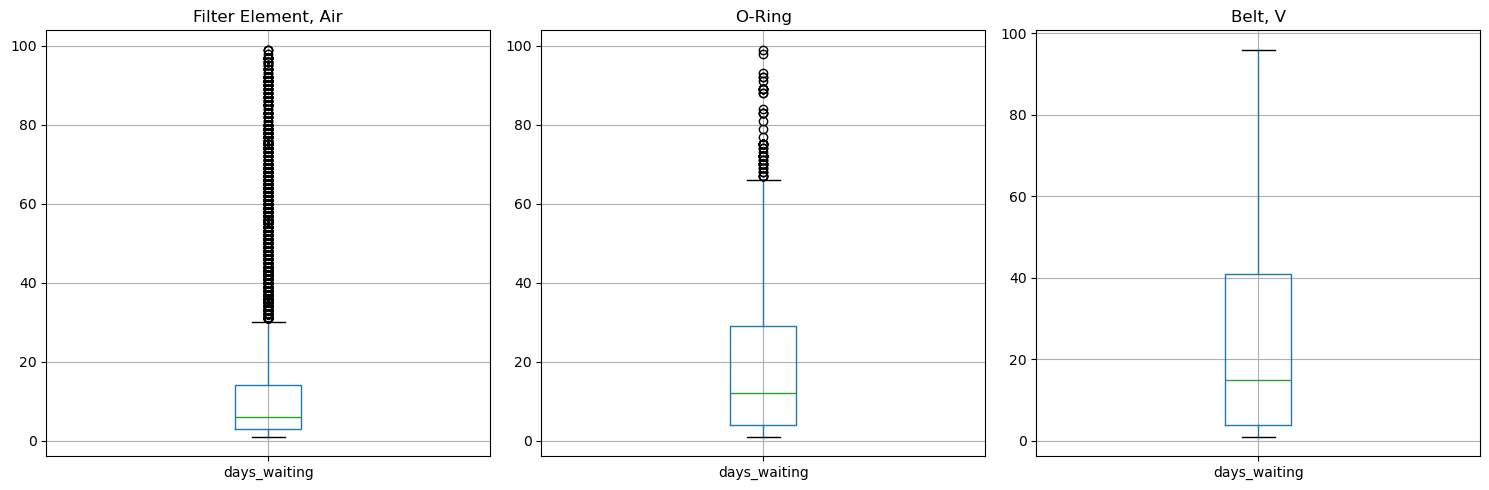

In [ ]:
#Comparing the amount of days waited for different types of parts

supply_filtered = supply[supply['days_waiting'].between(0, 100, inclusive='neither')] #Down to 29k from 35k

import matplotlib.pyplot as plt
supply_filtered['days_waiting'].describe().round(2) #mean 19 vs median 9

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

supply_filtered[supply_filtered['niin_nomenclature'] == 'FILTER ELEMENT,AIR'].boxplot(column ='days_waiting', ax=axs[0])  #11.5k records
axs[0].set_title('Filter Element, Air')

supply_filtered[supply_filtered['niin_nomenclature'] == 'O-RING'].boxplot(column ='days_waiting', ax=axs[1]) #1.2k records
axs[1].set_title('O-Ring')

supply_filtered[supply_filtered['niin_nomenclature'] == 'BELT,V'].boxplot(column ='days_waiting', ax=axs[2]) #900 records
axs[2].set_title('Belt, V')

plt.tight_layout()
plt.show()


In [ ]:
#Goal: 
#Compare days waiting for different niin_nonenclatures to see if there is any meaningful differences.

#First, need days_waiting column to have major outliers filtered out, no negative values. 

#Now, want to compare plots for these 3 most common niin_nomenclatures